# **Customer Churn Prediction using Deep Learning**

This project predicts customer churn for a bank using a deep learning model.  
The dataset contains customer demographics, account details, and service usage.  

**Goal:** Predict whether a customer will exit (churn) or stay.

In [6]:
pip install tensorflow

In [46]:
import tensorflow as tf
import seaborn as sns

In [8]:
print(tf.__version__)

2.19.0


In [9]:
## Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 📂 Dataset Description

- **Rows:** 10,000
- **Columns:** 14

### Features
- CreditScore – Customer’s credit score  
- Geography – Country (France, Spain, Germany)  
- Gender – Male / Female  
- Age – Age of customer  
- Tenure – Years with the bank  
- Balance – Account balance  
- NumOfProducts – Number of bank products used  
- HasCrCard – Has credit card (1 = Yes, 0 = No)  
- IsActiveMember – Active membership status  
- EstimatedSalary – Customer’s estimated salary  
- Exited – **Target variable** (1 = churned, 0 = retained)  

### Notes:
- Drop **RowNumber, CustomerId, Surname** → not predictive.


In [10]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [11]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
X = dataset.iloc[:,3:13]
y =dataset.iloc[:,13]

In [13]:
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
y.head(5)

,Exited
0,1
1,0
2,1
3,0
4,0


In [15]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True).astype(int)
gender = pd.get_dummies(X['Gender'],drop_first=True).astype(int)

In [16]:
## Concatenate this
X = X.drop(['Geography','Gender'],axis=1)

In [17]:
X = pd.concat([X, geography, gender], axis=1)

In [18]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


## 🔍 Exploratory Data Analysis

We explore:
- Churn rate distribution
- Churn vs Age, Balance, Tenure
- Churn by Geography and Gender
- Correlation heatmap for numeric features


/tmp/ipython-input-463578158.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Exited", data=dataset, palette="Set2")


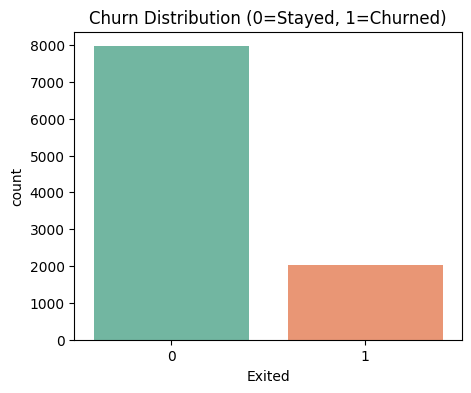

In [48]:
plt.figure(figsize=(5,4))
sns.countplot(x="Exited", data=dataset, palette="Set2")
plt.title("Churn Distribution (0=Stayed, 1=Churned)")
plt.show()

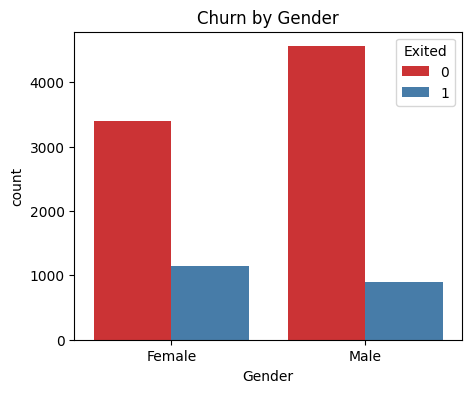

In [50]:
# 2. Gender vs Churn
# -------------------------
plt.figure(figsize=(5,4))
sns.countplot(x="Gender", hue="Exited", data=dataset, palette="Set1")
plt.title("Churn by Gender")
plt.show()

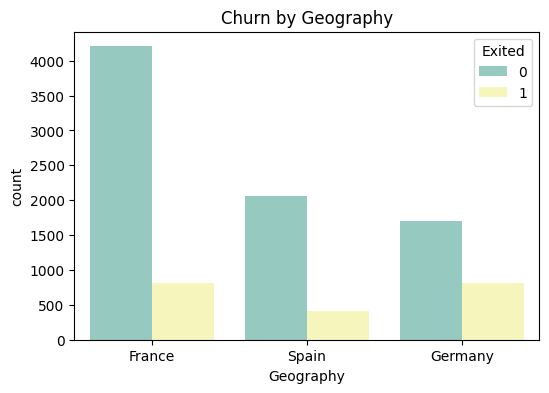

In [52]:
# 3. Geography vs Churn
# -------------------------
plt.figure(figsize=(6,4))
sns.countplot(x="Geography", hue="Exited", data=dataset, palette="Set3")
plt.title("Churn by Geography")
plt.show()

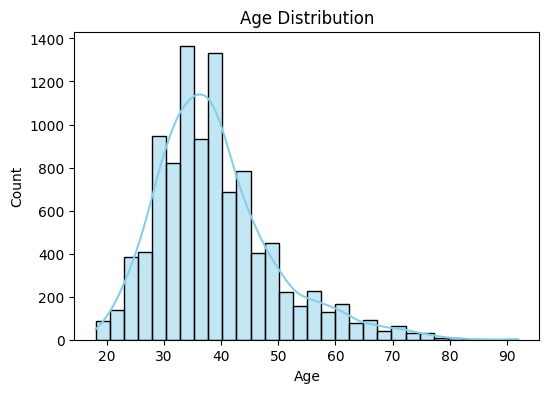

In [54]:
plt.figure(figsize=(6,4))
sns.histplot(dataset['Age'], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()

/tmp/ipython-input-3744867534.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Exited", y="Age", data=dataset, palette="coolwarm")


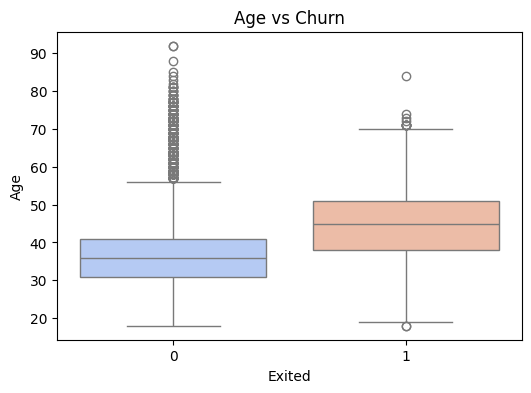

In [56]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Exited", y="Age", data=dataset, palette="coolwarm")
plt.title("Age vs Churn")
plt.show()

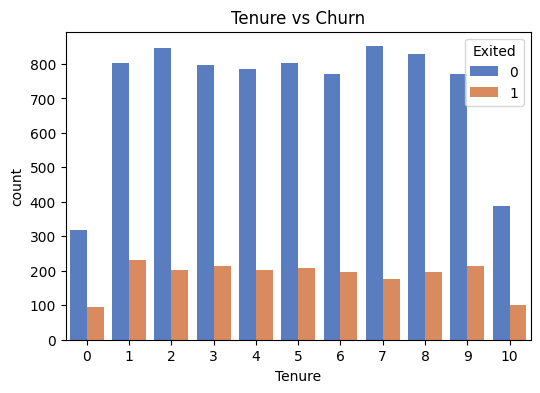

In [58]:
plt.figure(figsize=(6,4))
sns.countplot(x="Tenure", hue="Exited", data=dataset, palette="muted")
plt.title("Tenure vs Churn")
plt.show()

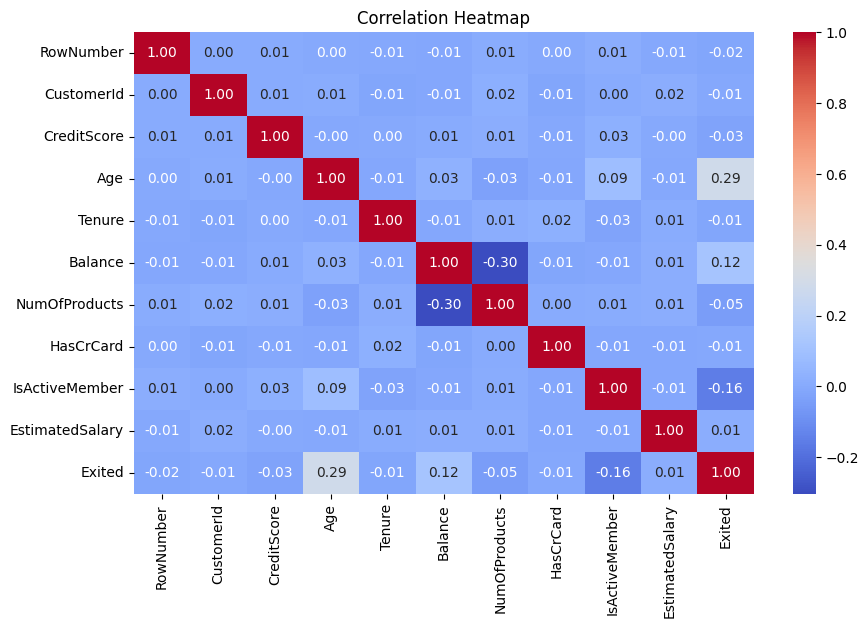

In [64]:
numeric_df = dataset.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
## Spliting Dataset Into Training And Testng Set
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [22]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [23]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [24]:
X_train.shape

(8000, 11)

## ⚡ Deep Learning Model

We use a **Neural Network (Keras/TensorFlow)**:
- Input: Encoded features (Geography, Gender) + numeric features
- Hidden Layers: Dense layers with ReLU, Dropout for regularization
- Output Layer: Sigmoid (binary classification)

### Training Setup:
- Loss: Binary Crossentropy
- Optimizer: Adam
- Metrics: Accuracy, Precision, Recall, F1, ROC-AUC
- Validation Split: 20%
- EarlyStopping used to avoid overfitting


In [25]:
## Part 2 lets Create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,ELU,PReLU
from tensorflow.keras.layers import Dropout

In [26]:
### Lets Initialize ANN
classifier = Sequential()


In [27]:
classifier.add(Dense(units=11,activation="relu")) ##Input Layer
classifier.add(Dense(units=6,activation="relu"))  ## First Hidden Layer
classifier.add(Dense(units=6,activation="relu"))  ## Second Hidden Layer

In [28]:
classifier.add(Dense(units=1,activation='sigmoid')) ## Output Layer

In [29]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
## Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [31]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7379 - loss: 0.5584 - val_accuracy: 0.7955 - val_loss: 0.4467
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7955 - loss: 0.4217 - val_accuracy: 0.8046 - val_loss: 0.4199
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8168 - loss: 0.3917 - val_accuracy: 0.8205 - val_loss: 0.3998
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8439 - loss: 0.3782 - val_accuracy: 0.8383 - val_loss: 0.3847
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8476 - loss: 0.3618 - val_accuracy: 0.8463 - val_loss: 0.3748
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8504 - loss: 0.3501 - val_accuracy: 0.8516 - val_loss: 0.3711
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8560 - loss: 0.3554 - val_accuracy: 0.8561 - val_loss: 0.3669
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8623 - loss: 0.3396 

In [32]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

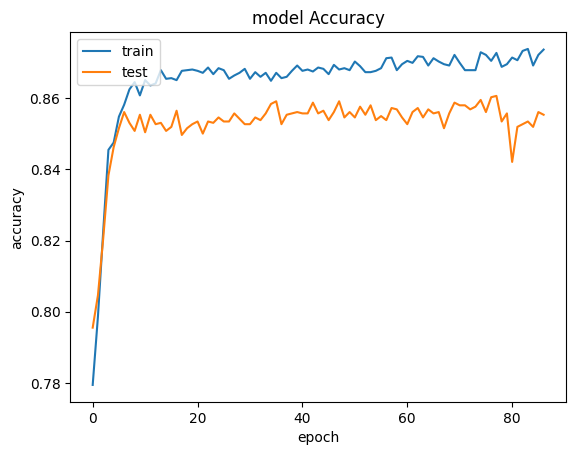

In [35]:
## Summary For Accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

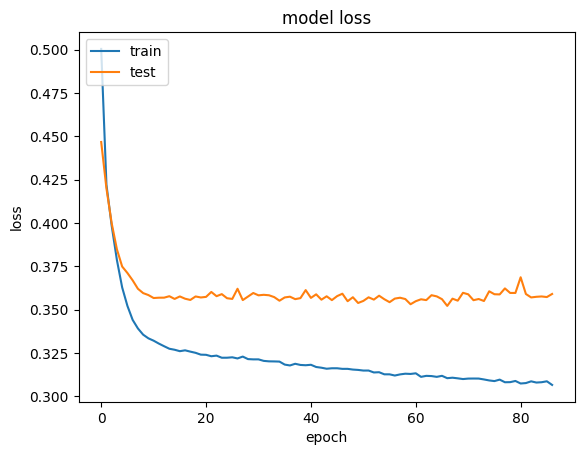

In [36]:
## Summary For Accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [37]:
## Making Prediction for evaluting Model

# Predicting Test Data
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [40]:
## Make The confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1487,  108],
       [ 184,  221]])

In [41]:
## Calculate Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [42]:
score

0.854

In [44]:
## get the weights
classifier.get_weights()

[array([[ 9.97382328e-02,  2.74436444e-01, -2.55464375e-01,
          3.39317739e-01, -3.78454715e-01, -2.32139863e-02,
         -6.69278279e-02,  9.25704837e-04, -1.39130995e-01,
          2.54621217e-03, -4.58646715e-02],
        [-1.30411655e-01,  6.05335593e-01,  5.46612322e-01,
         -5.63423753e-01,  6.86641276e-01,  1.43457234e-01,
          8.65248442e-01, -3.71248066e-01,  9.46294904e-01,
         -4.33713347e-01, -6.23779669e-02],
        [ 2.84253031e-01,  2.25568060e-02, -4.92786989e-02,
          2.24122450e-01,  2.27369860e-01,  1.40909823e-02,
         -2.40046471e-01,  3.02868873e-01,  1.59008875e-02,
         -1.74510404e-01, -1.17356062e-01],
        [ 3.19237411e-01, -8.82706195e-02, -4.57923353e-01,
         -2.24409297e-01, -1.96799919e-01,  3.98269951e-01,
         -1.26555279e-01, -3.52741368e-02,  1.89512402e-01,
         -1.64235860e-01,  1.23892045e+00],
        [ 9.36586410e-02, -4.80583161e-01, -9.62753475e-01,
         -5.20597517e-01,  4.56907786e-02,  

## 📊 Results

- Accuracy: 86%   
- Precision & Recall balanced  
- Model performs better than baseline Logistic Regression  

### Business Insights
- Customers with **short tenure, high balance, and month-to-month product usage** are more likely to churn.
- Retention strategies should target **Germany customers** and **younger customers with low tenure**.
